# **1. Perkenalan Dataset**


Dataset yang digunakan dalam eksperimen ini adalah **[Healthcare Dataset](https://www.kaggle.com/datasets/prasad22/healthcare-dataset)**.  

Tujuan utama dari dataset ini adalah memberikan sarana pembelajaran, eksplorasi, dan pengembangan keterampilan dalam **data analysis**, **machine learning**, serta **healthcare analytics**, tanpa melanggar privasi data pasien.

## 📊 Struktur Dataset
Dataset ini berisi informasi pasien, proses rawat inap, serta layanan kesehatan yang diberikan. Beberapa kolom penting di antaranya:

- **Name**: Nama pasien.  
- **Age**: Usia pasien (dalam tahun).  
- **Gender**: Jenis kelamin pasien (“Male” atau “Female”).  
- **Blood Type**: Golongan darah pasien.  
- **Medical Condition**: Kondisi medis utama atau diagnosis (misal: *Diabetes*, *Asthma*).  
- **Date of Admission / Discharge Date**: Tanggal masuk dan keluar rumah sakit.  
- **Doctor & Hospital**: Nama dokter dan rumah sakit tempat perawatan.  
- **Insurance Provider**: Penyedia asuransi pasien.  
- **Billing Amount**: Biaya layanan kesehatan.  
- **Admission Type**: Jenis masuk rumah sakit (“Emergency”, “Elective”, “Urgent”).  
- **Medication**: Obat yang diresepkan.  
- **Test Results**: Hasil tes medis (“Normal”, “Abnormal”, “Inconclusive”).

## 🎯 Tujuan Analisis
Dataset ini dapat digunakan untuk berbagai kasus analisis dan pembelajaran, antara lain:
- Praktik *data cleaning* dan *data preprocessing*.  
- Eksplorasi pola dan tren dalam data kesehatan.  
- Pengembangan model **machine learning** untuk memprediksi **Test Results** (Normal, Abnormal, Inconclusive) sebagai **multi-class classification problem**.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [2]:
#Type your code here
data = pd.read_csv('../healthcare_dataset.csv')

In [3]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# **4. Exploratory Data Analysis (EDA)**

In [4]:
#Type your code here
print("=" * 80)
print("1. INFORMASI DASAR DATASET")
print("=" * 80)
print(f"Dimensi Dataset: {data.shape[0]} baris x {data.shape[1]} kolom")
print(f"\nKolom-kolom: {list(data.columns)}")
print("\nTipe Data:")
print(data.dtypes)
print("\nInfo Dataset:")
print(data.info())

1. INFORMASI DASAR DATASET
Dimensi Dataset: 55500 baris x 15 kolom

Kolom-kolom: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']

Tipe Data:
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  ----

In [5]:
print("\n" + "=" * 80)
print("2. MISSING VALUES ANALYSIS")
print("=" * 80)
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_df = pd.DataFrame({
    'Kolom': missing_values.index,
    'Missing Count': missing_values.values,
    'Persentase (%)': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print("\nKolom dengan Missing Values:")
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("Tidak ada missing values!")


2. MISSING VALUES ANALYSIS

Kolom dengan Missing Values:
Tidak ada missing values!


In [6]:
print("\n" + "=" * 80)
print("3. DUPLICATE ROWS ANALYSIS")
print("=" * 80)
duplicate_count = data.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")
if duplicate_count > 0:
    print(f"Persentase duplikat: {(duplicate_count / len(data)) * 100:.2f}%")


3. DUPLICATE ROWS ANALYSIS
Jumlah baris duplikat: 534
Persentase duplikat: 0.96%


In [7]:
print("\n" + "=" * 80)
print("4. STATISTIK DESKRIPTIF")
print("=" * 80)
print("\nNumerical Columns:")
print(data.describe())

print("\nCategorical Columns:")
categorical_cols = data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(data[categorical_cols].describe())


4. STATISTIK DESKRIPTIF

Numerical Columns:
                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000

Categorical Columns:
               Name Gender Blood Type Medical Condition Date of Admission  \
count         55500  55500      55500             55500             55500   
unique        49992      2          8                 6              1827   
top     DAvId muNoZ   Male         A-         Arthritis        2024-03-16   
freq              3  27774       6969              9308                50   

               Doctor   Hospital Insurance Provider Admission Type  \
count           55500      

In [8]:
print("\n" + "=" * 80)
print("5. UNIQUE VALUES (untuk kolom kategorik)")
print("=" * 80)
for col in categorical_cols:
    unique_count = data[col].nunique()
    print(f"\n{col}:")
    print(f"  - Jumlah unique values: {unique_count}")
    if unique_count <= 20:  # Tampilkan value counts jika tidak terlalu banyak
        print(f"  - Value counts:\n{data[col].value_counts()}")



5. UNIQUE VALUES (untuk kolom kategorik)

Name:
  - Jumlah unique values: 49992

Gender:
  - Jumlah unique values: 2
  - Value counts:
Gender
Male      27774
Female    27726
Name: count, dtype: int64

Blood Type:
  - Jumlah unique values: 8
  - Value counts:
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

Medical Condition:
  - Jumlah unique values: 6
  - Value counts:
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

Date of Admission:
  - Jumlah unique values: 1827

Doctor:
  - Jumlah unique values: 40341

Hospital:
  - Jumlah unique values: 39876

Insurance Provider:
  - Jumlah unique values: 5
  - Value counts:
Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: 

In [9]:
print("\n" + "=" * 80)
print("6. OUTLIERS DETECTION (menggunakan IQR method)")
print("=" * 80)
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = len(outliers)
    print(f"\n{col}:")
    print(f"  - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  - Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  - Jumlah outliers: {outlier_count} ({(outlier_count/len(data))*100:.2f}%)")




6. OUTLIERS DETECTION (menggunakan IQR method)

Age:
  - Q1: 35.00, Q3: 68.00, IQR: 33.00
  - Lower Bound: -14.50, Upper Bound: 117.50
  - Jumlah outliers: 0 (0.00%)

Billing Amount:
  - Q1: 13241.22, Q3: 37820.51, IQR: 24579.28
  - Lower Bound: -23627.70, Upper Bound: 74689.43
  - Jumlah outliers: 0 (0.00%)

Room Number:
  - Q1: 202.00, Q3: 401.00, IQR: 199.00
  - Lower Bound: -96.50, Upper Bound: 699.50
  - Jumlah outliers: 0 (0.00%)



7. DATA DISTRIBUTION VISUALIZATION


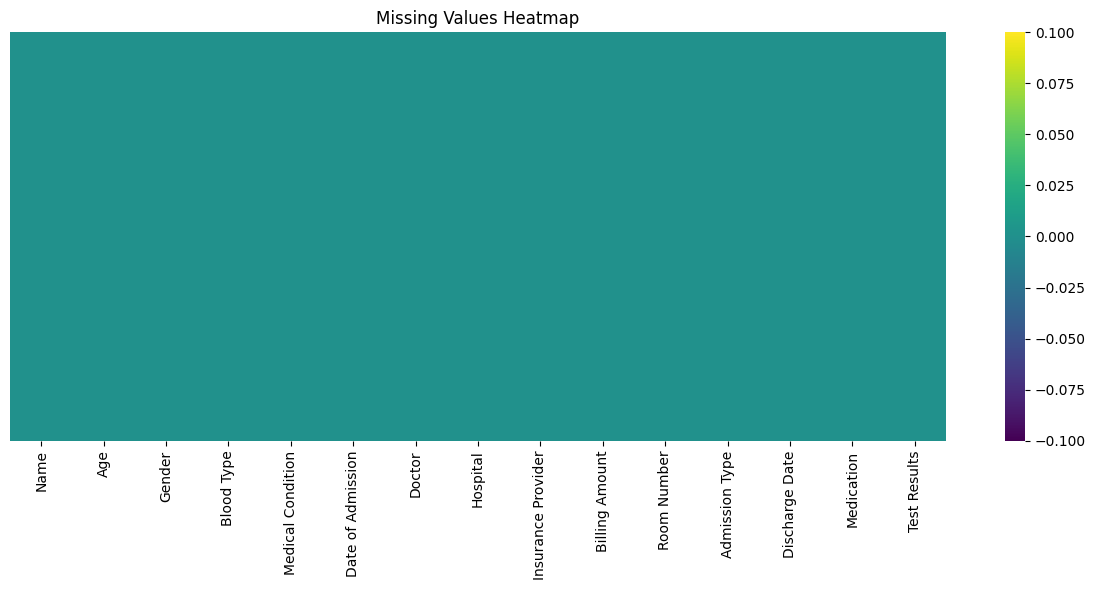

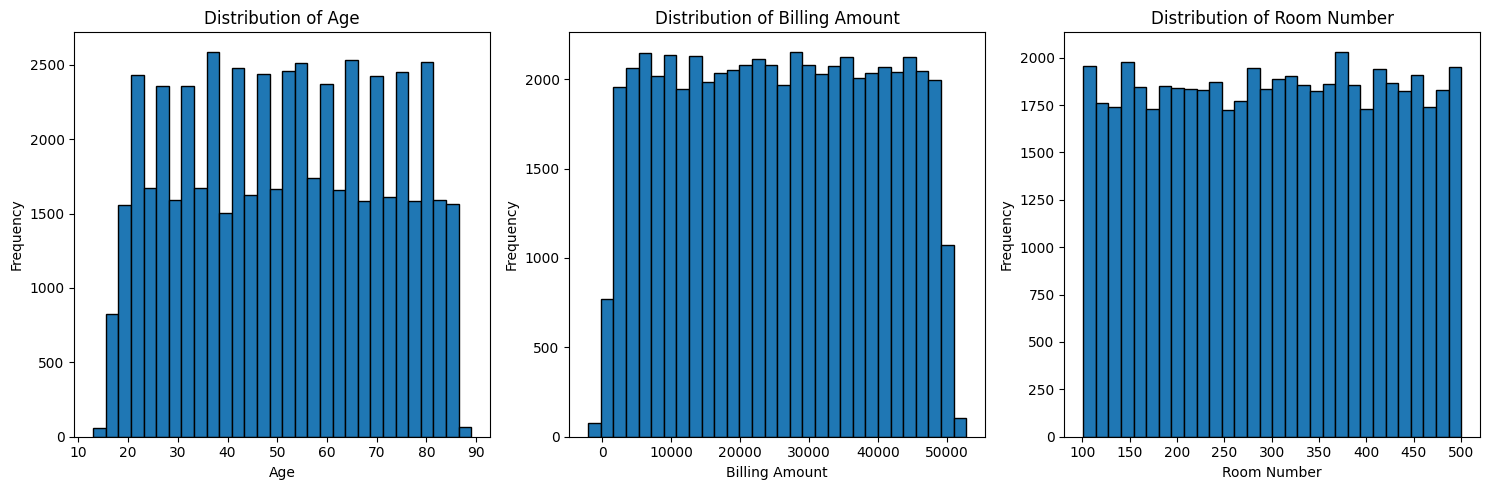

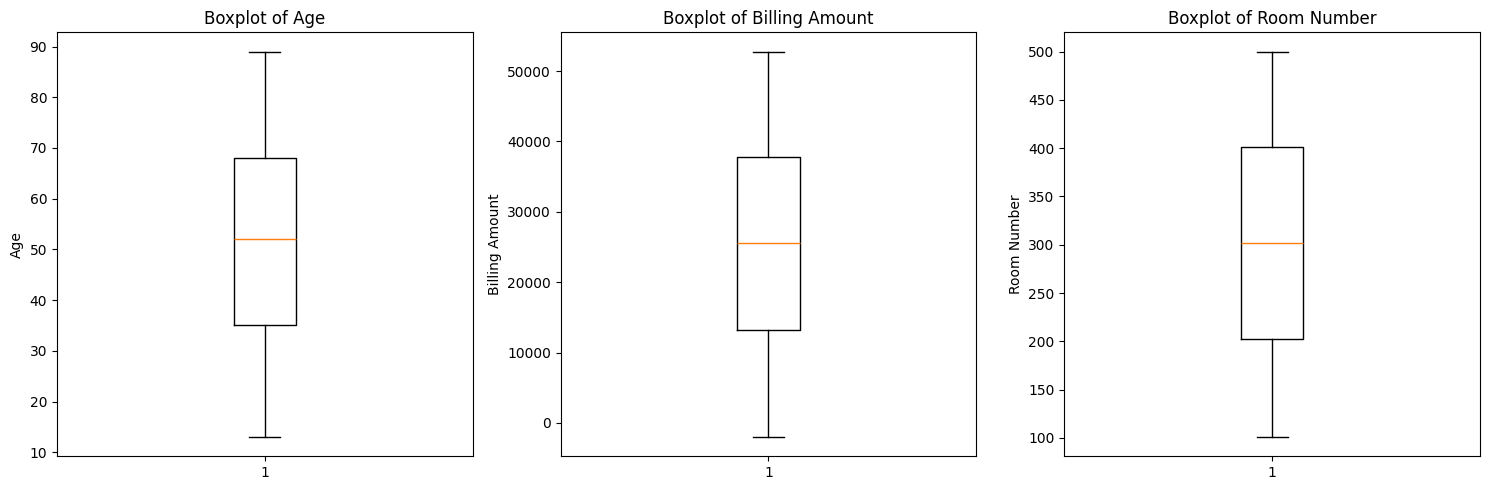

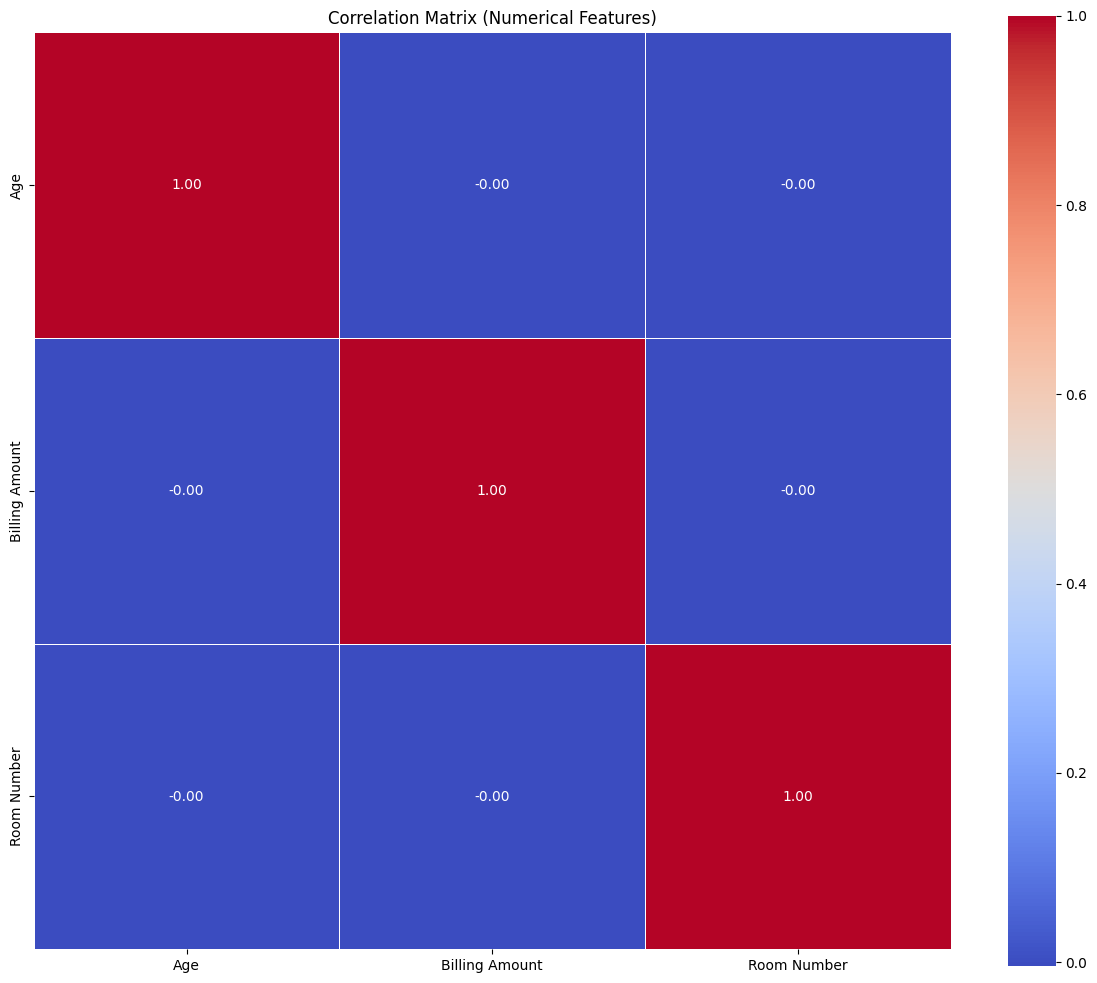

In [10]:
print("\n" + "=" * 80)
print("7. DATA DISTRIBUTION VISUALIZATION")
print("=" * 80)

# Visualisasi untuk numerical columns
if len(numerical_cols) > 0:
    # Missing values heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()
    
    # Histogram untuk numerical columns
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(numerical_cols) > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].hist(data[col].dropna(), bins=30, edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Boxplot untuk outliers detection
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(numerical_cols) > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].boxplot(data[col].dropna())
        axes[idx].set_title(f'Boxplot of {col}')
        axes[idx].set_ylabel(col)
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation heatmap
    if len(numerical_cols) > 1:
        plt.figure(figsize=(12, 10))
        correlation_matrix = data[numerical_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                    square=True, linewidths=0.5)
        plt.title('Correlation Matrix (Numerical Features)')
        plt.tight_layout()
        plt.show()




8. ANALISIS TARGET VARIABLE: Test Results

📊 Analisis kolom target: Test Results
Tipe data: object
Missing values: 0 (0.00%)
Unique values: 3

🎯 Tipe Problem: KLASIFIKASI

Distribusi Kelas:
  - Abnormal: 18627 (33.56%)
  - Normal: 18517 (33.36%)
  - Inconclusive: 18356 (33.07%)

⚠️ Class Imbalance Check:
  - Imbalance Ratio: 1.01
  - ✓ Dataset relatif balanced


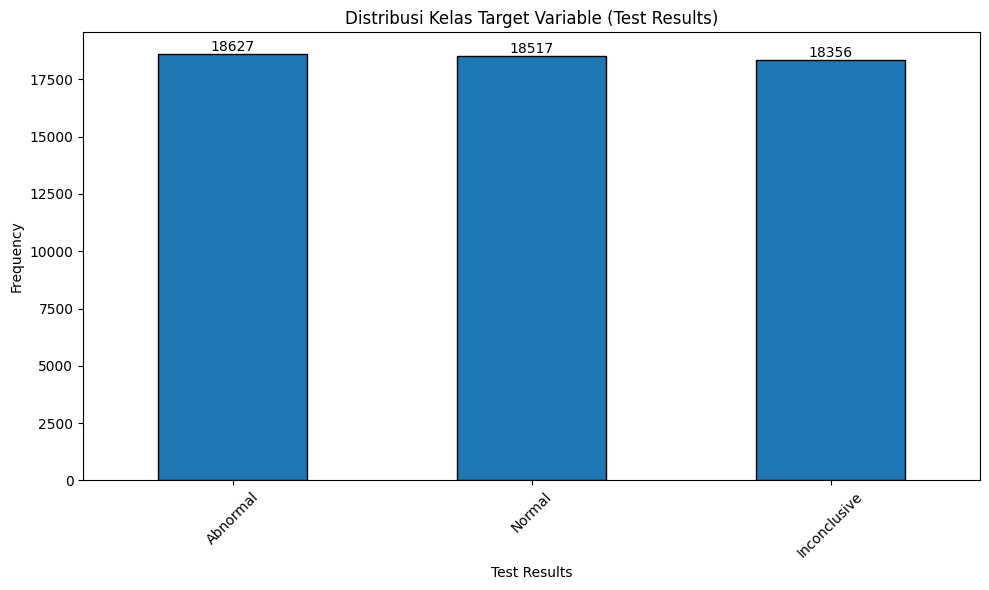

In [11]:
print("\n" + "=" * 80)
print("8. ANALISIS TARGET VARIABLE: Test Results")
print("=" * 80)

target_col = 'Test Results'
if target_col in data.columns:
    print(f"\n📊 Analisis kolom target: {target_col}")
    print(f"Tipe data: {data[target_col].dtype}")
    print(f"Missing values: {data[target_col].isnull().sum()} ({(data[target_col].isnull().sum()/len(data))*100:.2f}%)")
    print(f"Unique values: {data[target_col].nunique()}")
    
    # Check apakah klasifikasi atau regresi
    if data[target_col].dtype == 'object' or data[target_col].nunique() < 20:
        print(f"\n🎯 Tipe Problem: KLASIFIKASI")
        print(f"\nDistribusi Kelas:")
        class_counts = data[target_col].value_counts()
        class_percentages = data[target_col].value_counts(normalize=True) * 100
        
        for cls in class_counts.index:
            print(f"  - {cls}: {class_counts[cls]} ({class_percentages[cls]:.2f}%)")
        
        # Class Imbalance Check
        print(f"\n⚠️ Class Imbalance Check:")
        max_class_pct = class_percentages.max()
        min_class_pct = class_percentages.min()
        imbalance_ratio = max_class_pct / min_class_pct
        print(f"  - Imbalance Ratio: {imbalance_ratio:.2f}")
        if imbalance_ratio > 3:
            print(f"  - ⚠️ WARNING: Dataset imbalanced! Pertimbangkan teknik resampling (SMOTE, undersampling, etc.)")
        else:
            print(f"  - ✓ Dataset relatif balanced")
        
        # Visualisasi distribusi kelas
        plt.figure(figsize=(10, 6))
        class_counts.plot(kind='bar', edgecolor='black')
        plt.title('Distribusi Kelas Target Variable (Test Results)')
        plt.xlabel('Test Results')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        for i, v in enumerate(class_counts.values):
            plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"\n🎯 Tipe Problem: REGRESI")
        print(f"\nStatistik Target Variable:")
        print(data[target_col].describe())
        
        # Visualisasi distribusi target untuk regresi
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogram
        axes[0].hist(data[target_col].dropna(), bins=30, edgecolor='black')
        axes[0].set_title('Distribusi Test Results')
        axes[0].set_xlabel('Test Results')
        axes[0].set_ylabel('Frequency')
        
        # Boxplot
        axes[1].boxplot(data[target_col].dropna())
        axes[1].set_title('Boxplot Test Results')
        axes[1].set_ylabel('Test Results')
        
        plt.tight_layout()
        plt.show()
    
    

In [12]:
print("\n" + "=" * 80)
print("SUMMARY TEMUAN UNTUK DATA CLEANING & MODELING")
print("=" * 80)
print(f"✓ Total baris: {data.shape[0]}")
print(f"✓ Total kolom: {data.shape[1]}")
print(f"✓ Target variable: {target_col}")
print(f"✓ Missing values: {data.isnull().sum().sum()} cells")
print(f"✓ Duplicate rows: {duplicate_count}")
print(f"✓ Numerical columns: {len(numerical_cols)}")
print(f"✓ Categorical columns: {len(categorical_cols)}")
print("=" * 80)
 




SUMMARY TEMUAN UNTUK DATA CLEANING & MODELING
✓ Total baris: 55500
✓ Total kolom: 15
✓ Target variable: Test Results
✓ Missing values: 0 cells
✓ Duplicate rows: 534
✓ Numerical columns: 3
✓ Categorical columns: 12


# **5. Data Preprocessing**

In [13]:
data = data.drop(['Billing Amount', 'Room Number', 'Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date'], axis=1)

In [14]:
X = data.drop(['Test Results'], axis=1)
y = data['Test Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
transformer = make_column_transformer(
    [OneHotEncoder(handle_unknown='ignore', sparse_output=False),
     make_column_selector(dtype_exclude=np.number)],
    remainder='passthrough'
).set_output(transform='pandas')

X_train = transformer.fit_transform(X_train, y_train)
X_test = transformer.transform(X_test)

In [18]:
X_train.head()

,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Blood Type_A+,onehotencoder__Blood Type_A-,onehotencoder__Blood Type_AB+,onehotencoder__Blood Type_AB-,onehotencoder__Blood Type_B+,onehotencoder__Blood Type_B-,onehotencoder__Blood Type_O+,onehotencoder__Blood Type_O-,...,onehotencoder__Insurance Provider_UnitedHealthcare,onehotencoder__Admission Type_Elective,onehotencoder__Admission Type_Emergency,onehotencoder__Admission Type_Urgent,onehotencoder__Medication_Aspirin,onehotencoder__Medication_Ibuprofen,onehotencoder__Medication_Lipitor,onehotencoder__Medication_Paracetamol,onehotencoder__Medication_Penicillin,remainder__Age
22132,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48
44592,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,63
17135,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49
27382,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,29
51881,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,82


In [19]:
X_test.head()

,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Blood Type_A+,onehotencoder__Blood Type_A-,onehotencoder__Blood Type_AB+,onehotencoder__Blood Type_AB-,onehotencoder__Blood Type_B+,onehotencoder__Blood Type_B-,onehotencoder__Blood Type_O+,onehotencoder__Blood Type_O-,...,onehotencoder__Insurance Provider_UnitedHealthcare,onehotencoder__Admission Type_Elective,onehotencoder__Admission Type_Emergency,onehotencoder__Admission Type_Urgent,onehotencoder__Medication_Aspirin,onehotencoder__Medication_Ibuprofen,onehotencoder__Medication_Lipitor,onehotencoder__Medication_Paracetamol,onehotencoder__Medication_Penicillin,remainder__Age
55390,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,72
39921,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,64
19608,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,58
54786,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,78
39082,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,38


In [20]:
y_train.head()

22132      Normal
44592      Normal
17135      Normal
27382      Normal
51881    Abnormal
Name: Test Results, dtype: object

In [21]:
y_test.head()

55390    Inconclusive
39921          Normal
19608    Inconclusive
54786          Normal
39082    Inconclusive
Name: Test Results, dtype: object